In [1]:
from image_loader import ImageLoader, ImagePreprocessing
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import numpy as np
from sklearn.metrics import accuracy_score
from joblib import dump, load
from sklearn.model_selection import GridSearchCV

In [2]:
img_size = (100, 100)
train_dir = "images/train/train"
test_dir = "images/test/test"
classes = {"cat": 0, "dog": 1}
SZ = img_size[0]

In [3]:
image_loader = ImageLoader(dir_name=train_dir)

In [17]:
train_batch = image_loader.get_batch(start=0, stop=10, labels=classes, new_size=img_size, shuffle=True)
# эта функция берёт содержимое папки и перемешивает при каждом вызове одинаковым образом, возвращает сет фотографий и значений

['images/train/train/dog.4448.jpg', 'images/train/train/dog.956.jpg', 'images/train/train/cat.7397.jpg', 'images/train/train/cat.7009.jpg', 'images/train/train/dog.7586.jpg', 'images/train/train/dog.2383.jpg', 'images/train/train/dog.1993.jpg', 'images/train/train/dog.1368.jpg', 'images/train/train/dog.4739.jpg', 'images/train/train/cat.10142.jpg']


In [8]:
train_images = train_batch["data"]

In [9]:
train_labels = train_batch["target"]

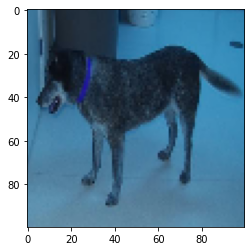

In [10]:
plt.imshow(train_images[0])

In [12]:
train_labels[0]

1

In [4]:
image_preprocessor = ImagePreprocessing(img_size=img_size)

In [21]:
# start tuning the model, first load a set for grid search

In [31]:
train_hog = []
test_hog = []

In [32]:
train_images = image_loader.get_batch(start=0, stop=19999, labels=classes, new_size=img_size, shuffle=True)
test_images = image_loader.get_batch(start=20000, stop=24999, labels=classes, new_size=img_size, shuffle=True)
train_labels = train_images["target"]
test_labels = test_images["target"]
for img in train_images["data"]:
    hog = image_preprocessor.get_hog(img)
    train_hog.append(hog)
for timg in test_images["data"]:
    thog = image_preprocessor.get_hog(timg)
    test_hog.append(thog)

['images/train/train/dog.4448.jpg', 'images/train/train/dog.956.jpg', 'images/train/train/cat.7397.jpg', 'images/train/train/cat.7009.jpg', 'images/train/train/dog.7586.jpg', 'images/train/train/dog.2383.jpg', 'images/train/train/dog.1993.jpg', 'images/train/train/dog.1368.jpg', 'images/train/train/dog.4739.jpg', 'images/train/train/cat.10142.jpg']
['images/train/train/cat.5893.jpg', 'images/train/train/dog.10345.jpg', 'images/train/train/dog.10809.jpg', 'images/train/train/dog.3219.jpg', 'images/train/train/cat.9641.jpg', 'images/train/train/cat.8893.jpg', 'images/train/train/cat.7507.jpg', 'images/train/train/dog.8943.jpg', 'images/train/train/dog.9576.jpg', 'images/train/train/cat.7539.jpg']


In [37]:
len(test_labels)



5000

In [35]:
unique, count = np.unique(train_labels, return_counts=True)
print(dict(zip(unique, count)))
unique, count = np.unique(test_labels, return_counts=True)
print(dict(zip(unique, count)))


{0: 10030, 1: 9970}
{0: 2470, 1: 2530}


In [10]:
model = SVC()
param_grid = {"C": np.linspace(0, 1, 20),
             "gamma": np.linspace(0, 1, 20),
             "kernel": ["poly"]}

In [11]:
clf = GridSearchCV(model, param_grid=param_grid, n_jobs=2)
clf.fit(train_hog, train_labels)

GridSearchCV(estimator=SVC(), n_jobs=2,
             param_grid={'C': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
                         'gamma': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
                         'kernel': ['poly']})

In [12]:
clf.best_params_

{'C': 0.05263157894736842, 'gamma': 0.05263157894736842, 'kernel': 'poly'}

In [38]:
svm_model = SVC(C=0.05263157894736842, gamma=0.05263157894736842, kernel="poly")

In [40]:
svm_model.fit(train_hog, train_labels)

SVC(C=0.05263157894736842, gamma=0.05263157894736842, kernel='poly')

In [41]:
accuracy_score(svm_model.predict(test_hog), test_labels)

0.795

In [42]:
dump(svm_model, "batch_trained_svm.joblib")

['batch_trained_svm.joblib']

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline

In [54]:
scaled_svm = Pipeline(steps=[('StandardScaler', StandardScaler()), ('SVC', SVC())])

In [55]:
param_grid = {"SVC__C": np.linspace(0, 5, 20),
             "SVC__gamma": np.linspace(0, 5, 20),
             "SVC__kernel": ["rbf", "poly", "linear"]}

In [56]:
scaled_svm_grid = GridSearchCV(scaled_svm, param_grid=param_grid, n_jobs=2)

In [58]:
grid_hog = []

In [59]:
grid_images = image_loader.get_batch(start=0, stop=999, labels=classes, new_size=img_size, shuffle=True)

['images/train/train/dog.4448.jpg', 'images/train/train/dog.956.jpg', 'images/train/train/cat.7397.jpg', 'images/train/train/cat.7009.jpg', 'images/train/train/dog.7586.jpg', 'images/train/train/dog.2383.jpg', 'images/train/train/dog.1993.jpg', 'images/train/train/dog.1368.jpg', 'images/train/train/dog.4739.jpg', 'images/train/train/cat.10142.jpg']


In [60]:
for img in grid_images["data"]:
    hog = image_preprocessor.get_hog(img)
    grid_hog.append(hog)

In [66]:
scaled_svm_grid.fit(grid_hog, grid_labels)

ValueError: The gamma value of 0.0 is invalid. Use 'auto' to set gamma to a value of 1 / n_features.

In [68]:
scaled_svm_grid.best_params_

{'SVC__C': 0.2631578947368421, 'SVC__gamma': 0.0, 'SVC__kernel': 'linear'}